In [94]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             precision_recall_curve, 
                             roc_curve, 
                             roc_auc_score)

from matplotlib import pyplot as plt
import numpy as np

In [3]:
mnist = datasets.fetch_openml('mnist_784', version = 1)

In [4]:
datasets.fetch_openml

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
mnist['data'].shape

(70000, 784)

In [8]:
28 ** 2

784

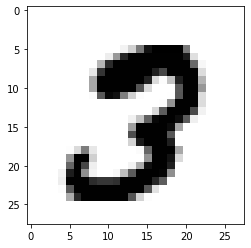

In [18]:
plt.imshow(mnist['data'][12345].reshape(28, 28), cmap = plt.cm.binary, interpolation='nearest')

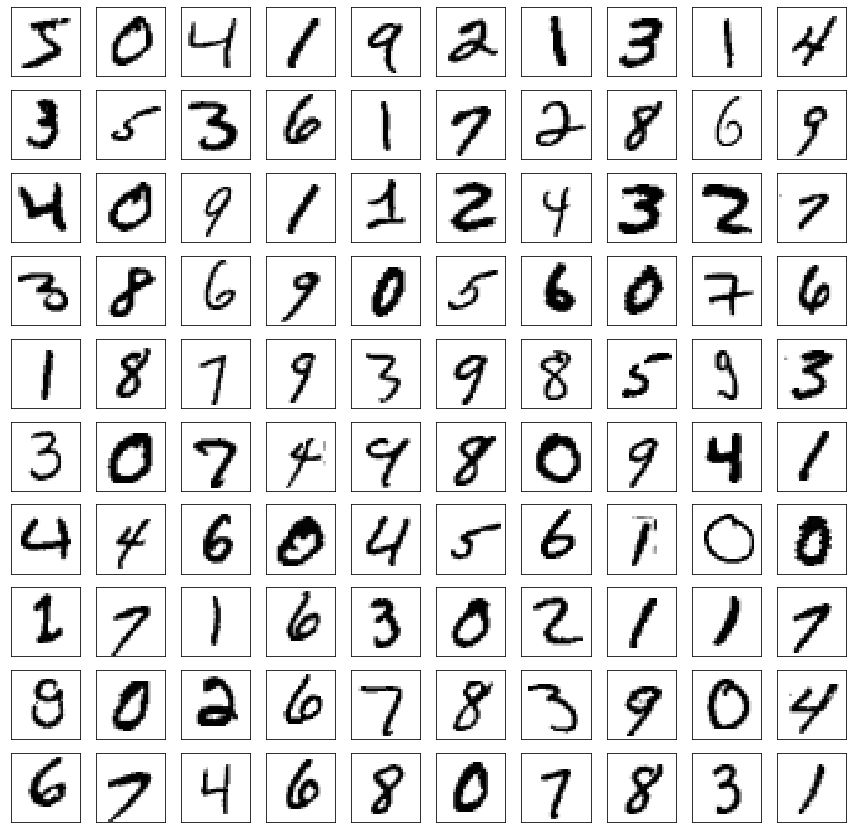

In [21]:
fig = plt.figure(figsize = (15, 15))

for i in range(100):
    fig.add_subplot(10, 10, i+1, xticks = [], yticks = [])
    plt.imshow(mnist['data'][i].reshape(28, 28), cmap = plt.cm.binary, interpolation='nearest')

In [23]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [80]:
s[-1]

array(['3', '5', '6', ..., '7', '9', '5'], dtype=object)

In [79]:
s = train_test_split(mnist['data'], mnist['target'], test_size = 0.2, random_state = 1101)

In [76]:
s[-1]

array(['6', '8', '9', ..., '8', '5', '3'], dtype=object)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(mnist['data'],
                                                    mnist['target'],
                                                    test_size = 0.2,
                                                    random_state = 10101)

y_train = y_train == '8'
y_test = y_test == '8'

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [27]:
X_train.shape, y_train.shape, X_test.shape

((56000, 784), (56000,), (14000, 784))

In [31]:
y_train,y_test

(array([False, False, False, ..., False, False,  True]),
 array([False,  True, False, ...,  True, False, False]))

In [82]:
LogisticRegression.fit

In [37]:
logreg = LogisticRegression(max_iter=10000)

In [47]:
result = logreg.fit(X_train, y_train)

In [49]:
result.predict(X_train)

array([False, False, False, ..., False, False,  True])

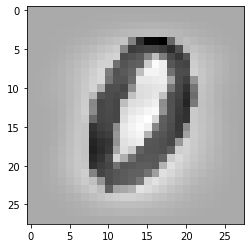

In [50]:
plt.imshow(X_train[0].reshape(28, 28), cmap = plt.cm.binary, interpolation='nearest')

In [48]:
y_train[0]

False

In [53]:
result.predict_proba(X_train)[:,1]

array([1.09892657e-02, 3.97751456e-05, 2.01421050e-04, ...,
       4.16562120e-03, 1.02810020e-04, 8.99643686e-01])

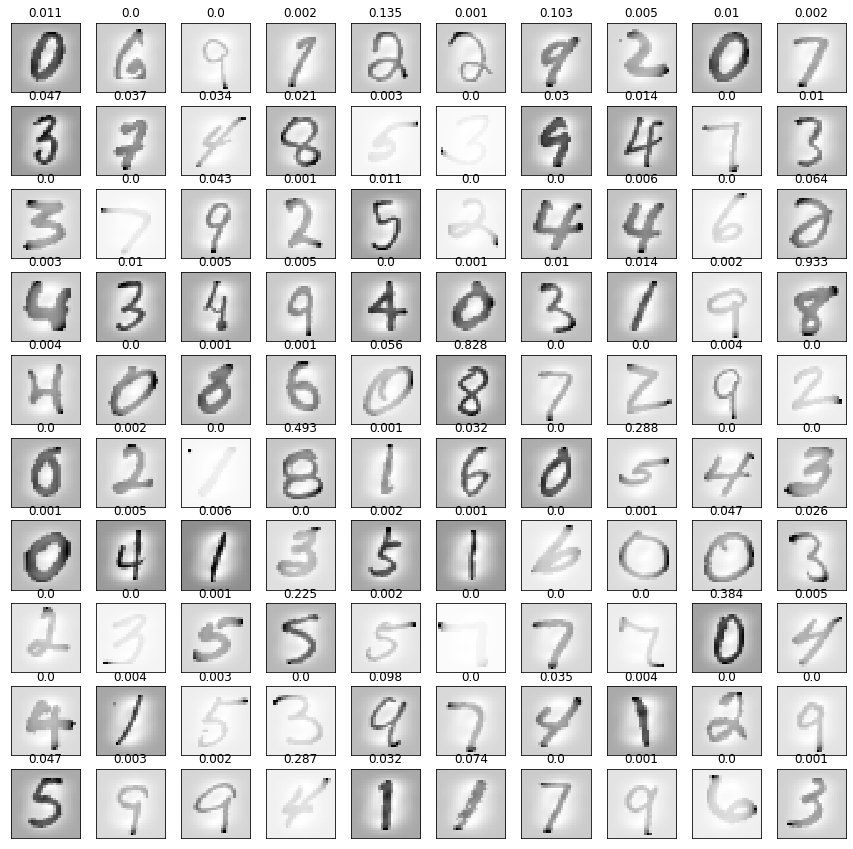

In [67]:
fig = plt.figure(figsize = (15, 15))

probs = result.predict_proba(X_train)[:,1]

for i in range(100):
    fig.add_subplot(10, 10, i+1, xticks = [], yticks = [])
    plt.imshow(X_train[i].reshape(28, 28), cmap = plt.cm.binary, interpolation='nearest')
    plt.title(probs[i].round(3))

In [65]:
confusion_matrix(y_train, logreg.predict(X_train))

array([[49957,   610],
       [ 1449,  3984]])

In [66]:
confusion_matrix(y_test, logreg.predict(X_test))

array([[12424,   184],
       [  422,   970]])

In [62]:
 1449 +   3984

5433

In [70]:
precision_score(y_test, logreg.predict(X_test))

0.8405545927209706

In [71]:
970/(970 + 184)

0.8405545927209706

In [72]:
recall_score(y_test, logreg.predict(X_test))

0.6968390804597702

In [73]:
970/(422 + 970)

0.6968390804597702

In [90]:
(0.001 + 0.1)/2

0.0505

In [89]:
((1/0.001 + 1/0.1)/2)**(-1)

0.0019801980198019802

In [91]:
f1_score(y_test, logreg.predict(X_test))

0.7619795758051846

In [97]:
probs = logreg.predict_proba(X_test)[:,1]

In [99]:
logodds = np.log(probs) - np.log(1-probs)

In [101]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logodds)

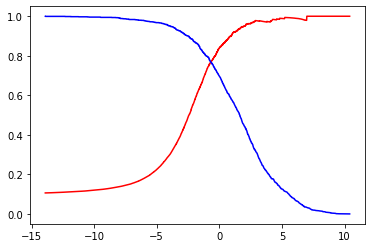

In [104]:
plt.plot(thresholds, precisions[:-1], 'r')
plt.plot(thresholds, recalls[:-1], 'b')

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, logodds)

Text(0, 0.5, 'True positive rate')

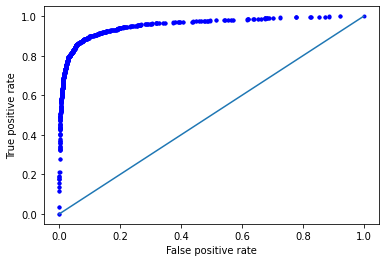

In [111]:
plt.plot(fpr, tpr, 'b.')
plt.plot([0, 1], [0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [113]:
roc_auc_score(y_test, logodds)

0.956867663388325